# ML_Assignment_1
Pooja Umathe
12-19-2018

California Housing Prices:

The data contains information from the 1990 California census.In this sample a block group on average includes 1425.5 individuals living in a geographically co mpact area. Naturally, the geographical area included varies inversely with the population density. W e computed distances among the centroids of each block group as measured in latitude and longitude. W e excluded all the block groups reporting zero entries for the independent and dependent variables. The final data contained 20,640 observations on 9 variables. The dependent variable is ln(median house value).

The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data.

longitude

latitude

housing_median_age

total_rooms

total_bedrooms

population

households

median_income

median_house_value

ocean_proximity

In [0]:
# Importing libraires and resources

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import  ElasticNet
from sklearn.linear_model import  Ridge
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import  Lasso
from sklearn.model_selection import GridSearchCV
import matplotlib

%matplotlib inline

In [0]:
# Importing data

from sklearn.datasets import fetch_california_housing
housing= fetch_california_housing()

In [0]:
housing.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [0]:
dataset = pd.DataFrame(
    data=housing.data,
    columns=housing.feature_names
)

In [0]:
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [0]:
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
MedInc        20640 non-null float64
HouseAge      20640 non-null float64
AveRooms      20640 non-null float64
AveBedrms     20640 non-null float64
Population    20640 non-null float64
AveOccup      20640 non-null float64
Latitude      20640 non-null float64
Longitude     20640 non-null float64
dtypes: float64(8)
memory usage: 1.3 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


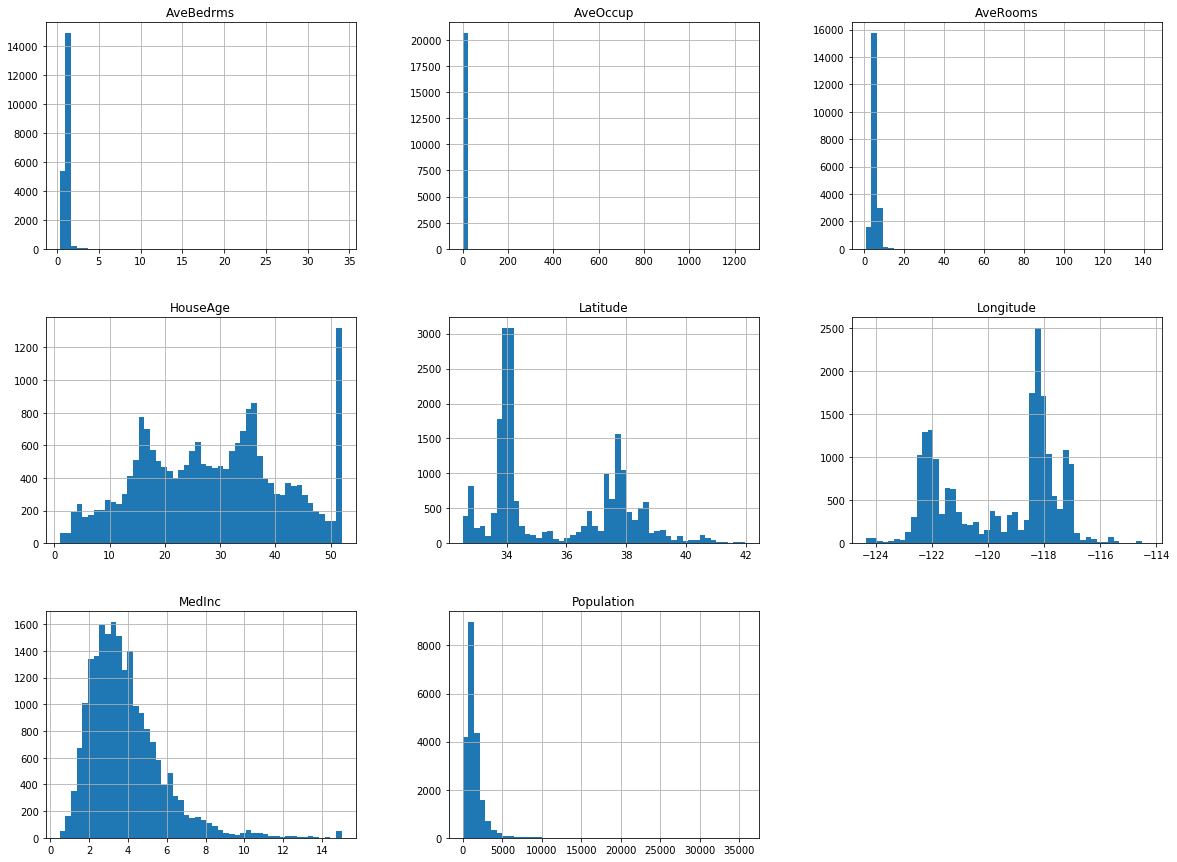

In [0]:
# Histogram
dataset.hist(bins=50, figsize=(20,15))
plt.show()

C:\Users\Ashwin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


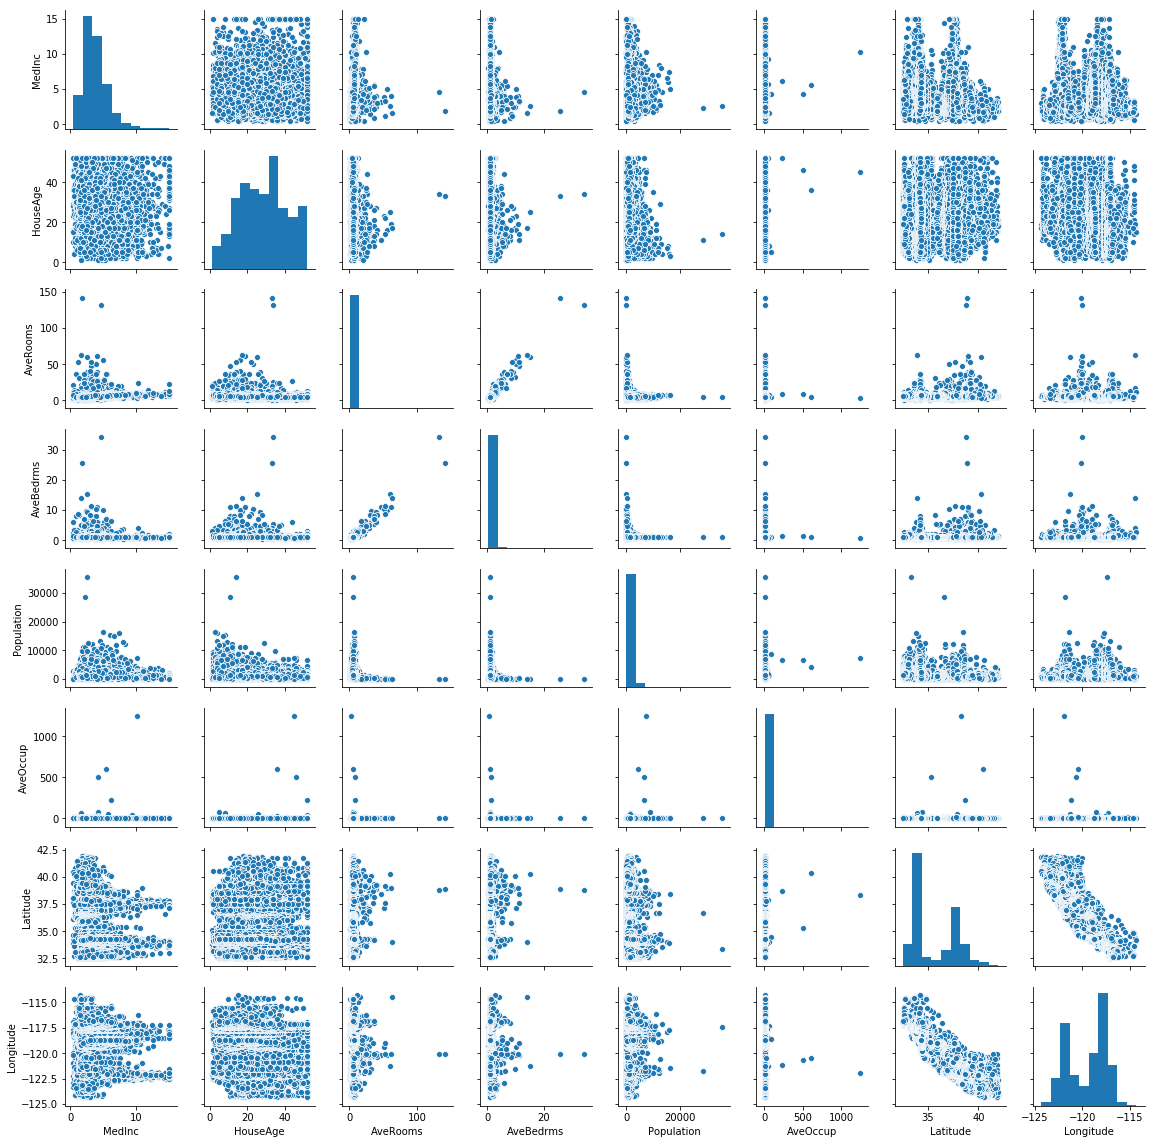

In [0]:
sns.pairplot(dataset, size = 2)
plt.show()

In [0]:
print(housing.DESCR)

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/datasets/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.




In [0]:
import pandas as pd
import numpy as np

dataset = pd.DataFrame(
    data=housing.data,
    columns=housing.feature_names
)
dataset['target'] = housing.target
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [0]:
dataset.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [0]:
dataset.info()
dataset.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
MedInc        20640 non-null float64
HouseAge      20640 non-null float64
AveRooms      20640 non-null float64
AveBedrms     20640 non-null float64
Population    20640 non-null float64
AveOccup      20640 non-null float64
Latitude      20640 non-null float64
Longitude     20640 non-null float64
target        20640 non-null float64
dtypes: float64(9)
memory usage: 1.4 MB


,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
target,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


# Visualizing the univariate distribution of each feature, and the distribution of the target.

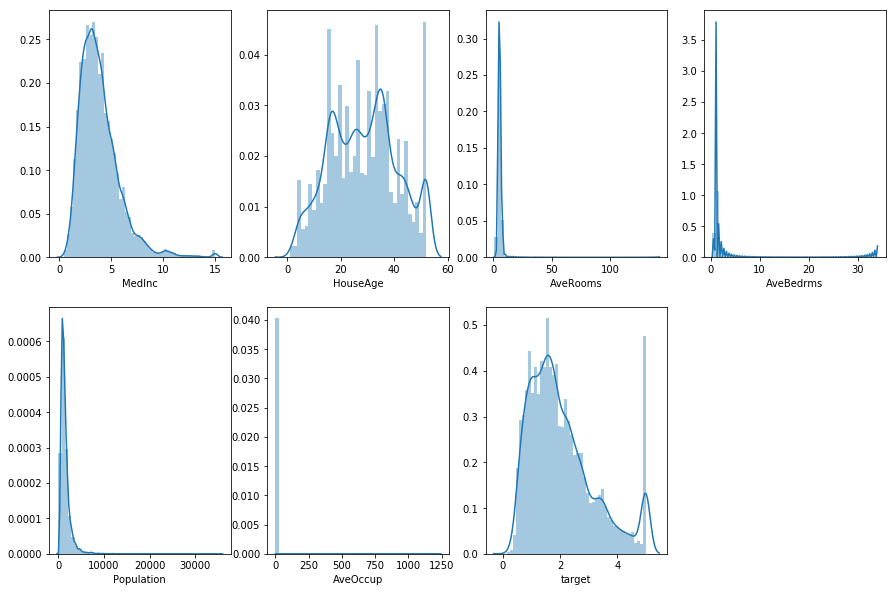

In [0]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

dataset_plot_uni = dataset.copy().drop(['Longitude', 'Latitude'], axis=1)

"""
g = sns.pairplot(
    dataset_plot_uni, 
    kind='scatter',
    y_vars=dataset_plot_uni.columns,
    x_vars=dataset_plot_uni.columns
)
"""

plt.figure(figsize=(15,10))
for column in dataset_plot_uni:
    i = dataset_plot_uni.columns.get_loc(column) + 1
    plt.subplot(2,4,i)
    sns.distplot(dataset_plot_uni[column])
plt.show()

# Visualizing the dependency of the target on each feature

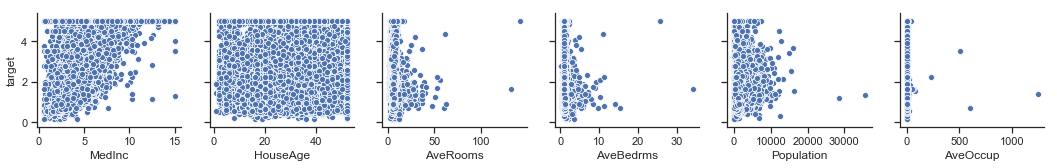

In [0]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(
    dataset,
    kind='scatter',
    y_vars=['target'],
    x_vars=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
)

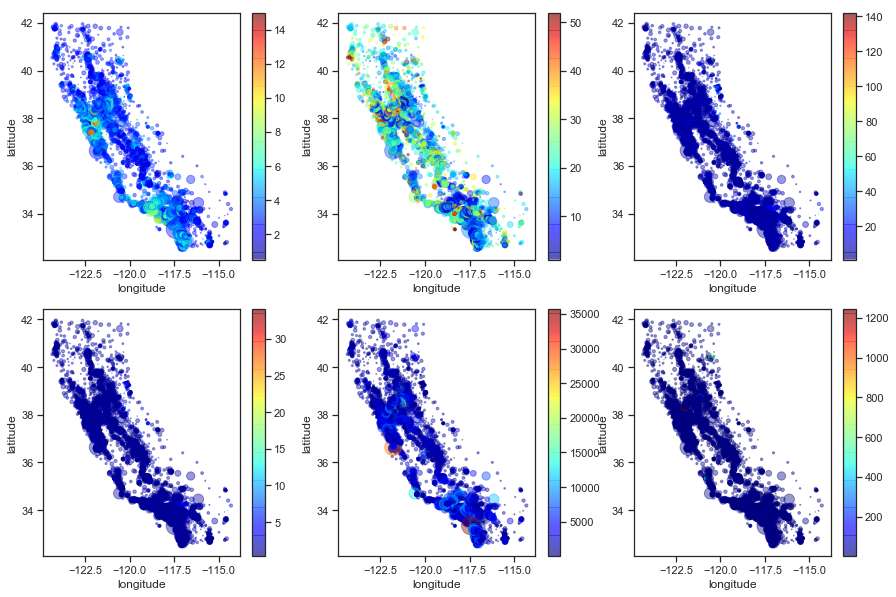

In [0]:
import matplotlib.pyplot as plt

dataset_plot_geo = dataset.copy().drop(['target', 'Longitude', 'Latitude'], axis=1)

plt.figure(figsize=(15,10))
for column in dataset_plot_geo:
    i = dataset_plot_uni.columns.get_loc(column) + 1
    
    plt.subplot(2, 3, i)   
    plt.scatter(
        dataset['Longitude'],
        dataset['Latitude'],
        c=dataset[column],
        label=column,
        s=dataset['Population']/100,
        cmap=plt.get_cmap("jet"),
        # cmap='viridis',
        alpha=0.4
    )
    plt.colorbar() # if i % 3 == 0 else False
    plt.xlabel('longitude')
    plt.ylabel('latitude')
    
plt.show()

In [0]:
# Modeling

import  statsmodels.formula.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import  LinearRegression, Lasso, Ridge, ElasticNet

from sklearn.model_selection import train_test_split
X = dataset.copy().drop(['Latitude', 'Longitude', 'target'], axis=1)
y = dataset.loc[:, 'target']
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=0)

In [0]:
# Linear Regression (OLS)

def regresssor_model(x, y, estimator):
    regressor=estimator()
    regressor.fit(x,y)
    lr_rmse=np.sqrt(mean_squared_error(y,regressor.predict(x)))
    cv_regressor=cross_val_score(cv=10,X=x,y=y,estimator=regressor,scoring='r2')
    print('The cross validated accuracy  - '+str(100*cv_regressor.mean()))
    print('The corss validated variance is - '+str(100*cv_regressor.std()))
    
    return regressor

def evaluate(ytest, regressor):
    regressor.fit(xtrain,ytrain)
    ypred = regressor.predict(xtest)
    print("root mean squared error for test data is %1.2f " % np.sqrt(mean_squared_error(ytest, ypred)))
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.xlabel('(ytest) - (ypred)')
    plt.ylabel('frequency')
    plt.title('residual plot')
    plt.hist(ytest-ypred)
    
    plt.subplot(1,2,2)
    plt.bar(np.arange(len(regressor.coef_)),regressor.coef_,color='red')
    plt.xlabel('coefficients')
    plt.ylabel('coefficients value')
    plt.title('coeff graph')
    
    plt.show()
    
def residual(ytest, regressor):
    regressor.fit(xtrain,ytrain)
    ypred = regressor.predict(xtest)
    
    print("root mean squared error for test data is %1.2f " % np.sqrt(mean_squared_error(ytest, ypred)))
    plt.xlabel('(ytest) - (ypred)')
    plt.ylabel('frequency')
    plt.title('residual plot')
    plt.hist(ytest-ypred)
    plt.show()
    
def coef(regressor):
    plt.bar(np.arange(len(regressor.coef_)),regressor.coef_,color='red')
    plt.xlabel('coefficients')
    plt.ylabel('coefficients value')
    plt.title('coeff graph')
    plt.show

The cross validated accuracy  - 54.54819507095119
The corss validated variance is - 2.6007020262153744
---
The cross validated accuracy  - 54.550642877313834
The corss validated variance is - 2.597721571557987
---
The cross validated accuracy  - 28.914083814012248
The corss validated variance is - 0.9588882892686892
---
The cross validated accuracy  - 42.806619699853805
The corss validated variance is - 1.7008157518786566
---


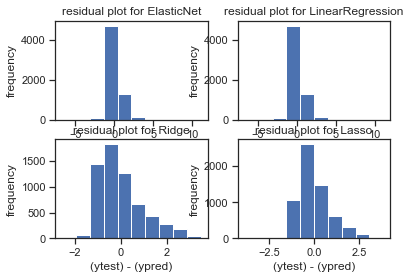

In [0]:
# Evaluating Linear Regression (OLS), Ridge, Lasso and ElasticNet using cross-validation with the default parameters

model_names = ['LinearRegression', 'Ridge', 'Lasso', 'ElasticNet']
models = [LinearRegression, Ridge, Lasso, ElasticNet]

plt.figure()
for i, model in enumerate(models):
    l=regresssor_model(xtrain.values,ytrain.values,model)
    l.fit(xtrain,ytrain)
    ypred = l.predict(xtest)
    print('---')
    
    plt.subplot(2, 2, i + 1)
    plt.xlabel('(ytest) - (ypred)')
    plt.ylabel('frequency')
    plt.title('residual plot for {}'.format(model_names[i - 1]))
    plt.hist(ytest-ypred)
plt.show()

The cross validated accuracy  - 54.54819507095119
The corss validated variance is - 2.6007020262153744
---


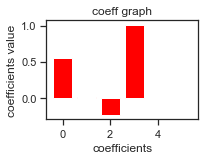

The cross validated accuracy  - 54.550642877313834
The corss validated variance is - 2.597721571557987
---


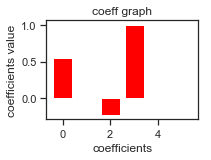

The cross validated accuracy  - 28.914083814012248
The corss validated variance is - 0.9588882892686892
---


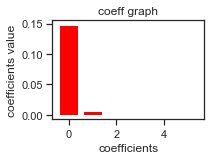

The cross validated accuracy  - 42.806619699853805
The corss validated variance is - 1.7008157518786566
---


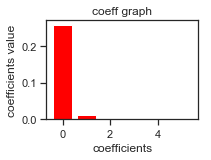

In [0]:
from sklearn.model_selection import train_test_split
X = dataset.copy().drop(['Latitude', 'Longitude', 'target'], axis=1)
y = dataset.loc[:, 'target']
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=0)

plt.figure()
for i, model in enumerate(models):
    l=regresssor_model(xtrain.values,ytrain.values,model)
    l.fit(xtrain,ytrain)
    print('---')
    
    plt.subplot(2, 2, i + 1)
    plt.bar(np.arange(len(l.coef_)),l.coef_,color='red')
    plt.xlabel('coefficients')
    plt.ylabel('coefficients value')
    plt.title('coeff graph')
    plt.show()

In [0]:
# (Normalize / Scale / Transform)

from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
xtrain=ms.fit_transform(xtrain)
xtest=ms.transform(xtest)
xtrain

array([[0.10172963, 1.        , 0.01483703, 0.01086957, 0.00532526,
        0.00680341],
       [0.12141212, 0.82352941, 0.02145483, 0.02522082, 0.02334707,
        0.00378662],
       [0.39993241, 0.31372549, 0.04276702, 0.02236894, 0.03879032,
        0.00510955],
       ...,
       [0.18605261, 0.58823529, 0.02122505, 0.01802794, 0.01964741,
        0.00173858],
       [0.35389857, 0.64705882, 0.0280547 , 0.02166312, 0.02940105,
        0.00250076],
       [0.06126122, 0.2745098 , 0.0234144 , 0.02274717, 0.02861627,
        0.00448481]])

The cross validated accuracy  - 54.54819507095118
The corss validated variance is - 2.6007020262153135
---
The cross validated accuracy  - 52.92391366691012
The corss validated variance is - 2.5595885700294687
---
The cross validated accuracy  - -0.06871957296246123
The corss validated variance is - 0.06951793867573253
---
The cross validated accuracy  - -0.06871957296246123
The corss validated variance is - 0.06951793867573253
---


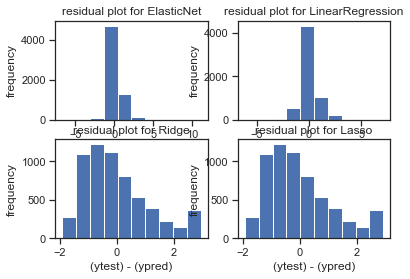

In [0]:
plt.figure()
for i, model in enumerate(models):
    l=regresssor_model(xtrain,ytrain,model)
    l.fit(xtrain,ytrain)
    ypred = l.predict(xtest)
    print('---')
    
    plt.subplot(2, 2, i + 1)
    plt.xlabel('(ytest) - (ypred)')
    plt.ylabel('frequency')
    plt.title('residual plot for {}'.format(model_names[i - 1]))
    plt.hist(ytest-ypred)
plt.show()

The cross validated accuracy  - 54.54819507095118
The corss validated variance is - 2.6007020262153135
---
The cross validated accuracy  - 52.92391366691012
The corss validated variance is - 2.5595885700294687
---
The cross validated accuracy  - -0.06871957296246123
The corss validated variance is - 0.06951793867573253
---
The cross validated accuracy  - -0.06871957296246123
The corss validated variance is - 0.06951793867573253
---


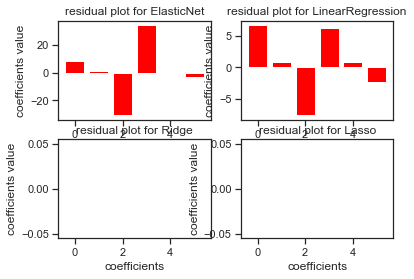

In [0]:
plt.figure()
for i, model in enumerate(models):
    l=regresssor_model(xtrain,ytrain,model)
    l.fit(xtrain,ytrain)
    print('---')

    plt.subplot(2, 2, i + 1)
    plt.bar(np.arange(len(l.coef_)),l.coef_,color='red')
    plt.xlabel('coefficients')
    plt.ylabel('coefficients value')
    plt.title('residual plot for {}'.format(model_names[i - 1]))
plt.show()

In [0]:
# After the normalization, we can see the pretty less effect on the regression residuals.

#Tuning the parameters of the models using GridSearchCV.

In [0]:
param_grid_lg = {
    'fit_intercept': [True, False]
}

param_grid_ridge = {
    'alpha': np.logspace(0, 2, 13, 20),
    'max_iter': [1, 10, 100, 500, 1000, 2000],
    'tol': [0.001, 0.0001],
}

param_grid_lasso = {
    'alpha': np.logspace(0, 2, 13, 20),
    'max_iter': [1, 10, 100, 500, 1000, 2000],
    'tol': [0.001, 0.0001],
}

param_grid_enet = {
    'alpha': np.logspace(0, 2, 13, 20),
    'max_iter': [1, 10, 100, 500, 1000, 2000],
    'tol': [0.001, 0.0001],
    'l1_ratio': [10, 1, 0.1, 0.01, 0.001]
}

param_list = []
param_list.append(param_grid_lg)
param_list.append(param_grid_ridge)
param_list.append(param_grid_lasso)
param_list.append(param_grid_enet)

ElasticNet

sklearn.linear_model.coordinate_descent.ElasticNet

In [0]:
models_tuned = []

for i, model in enumerate(models):
    print('RUNNING FOR {}'.format(model_names[i]))
    l = model()
    gc = GridSearchCV(l,param_list[i],cv=10,scoring='r2',n_jobs=-1)
    gc.fit(xtrain,ytrain)

    print("Best cross-validation score: {:.2f}".format(gc.best_score_))
    print("Best parameters: ", gc.best_params_)
    gc.best_estimator_
    models_tuned.append(gc.best_estimator_)

In [0]:
alphas = np.logspace(0, 2, 13, 20)
train_scores_mean = gc.cv_results_["mean_train_score"]
train_scores_std = gc.cv_results_["std_train_score"]
test_scores_mean = gc.cv_results_["mean_test_score"]
test_scores_std = gc.cv_results_["std_test_score"]

plt.figure()
plt.title('Model')
plt.xlabel('$\\alpha$ (alpha)')
plt.ylabel('Score')
# plot train scores
plt.semilogx(alphas, train_scores_mean, label='Mean Train score', color='navy')

# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(alphas, train_scores_mean - train_scores_std,
                       train_scores_mean + train_scores_std, alpha=0.2, color='navy')
plt.semilogx(alphas, test_scores_mean, label='Mean Test score', color='darkorange')

# shaded graph of MSE
plt.gca().fill_between(alphas, test_scores_mean - test_scores_std,
                       test_scores_mean + test_scores_std, alpha=0.2, color='darkorange')
plt.legend(loc='best')
plt.show()

In [0]:
plt.figure()
for i, model in enumerate(models_tuned):
    print(type(model))
    
    regressor = model
    x, y = xtrain.values, ytrain.values
    regressor.fit(x,y)
    lr_rmse=np.sqrt(mean_squared_error(y,regressor.predict(x)))
    cv_regressor=cross_val_score(cv=10,X=x,y=y,estimator=regressor,scoring='r2')
    print('The cross validated accuracy  - '+str(100*cv_regressor.mean()))
    print('The corss validated variance is - '+str(100*cv_regressor.std()))
    
    plt.subplot(2, 2, i + 1)
    plt.xlabel('(ytest) - (ypred)')
    plt.ylabel('frequency')
    plt.title('residual plot for {}'.format(model_names[i - 1]))
    plt.hist(ytest-ypred)

f = plt.figure()
for i, model in enumerate(models_tuned):
    l = model
    plt.subplot(2, 2, i + 1)
    plt.bar(np.arange(len(l.coef_)),l.coef_,color='red')
    plt.xlabel('coefficients')
    plt.ylabel('coefficients value')
    plt.title('residual plot for {}'.format(model_names[i - 1]))
    
f.show()

Conclusion: grid cv search is the best as compare to all others as I tried 4 different models. I got this is the best one.